# Topics

## 1. DFT and Power Spectrum
## 2. Parseval's Theorem



## In what follows:
## tone_data: y_k
## ft = np.fft(tone_data): Y_n

## A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2-1] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms,  in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input.

Modified from: http://docs.scipy.org/doc/numpy/reference/routines.fft.html


## Inverse FFT

## Breakout: write functions get_tone() and plot_fourier().

## get_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False) returns the numpy array for a tone.

## plot_fourier(sample_rate, signal, freq_lim = 1000.) plots the real and imaginary parts of the signal, and returns ft and freq.

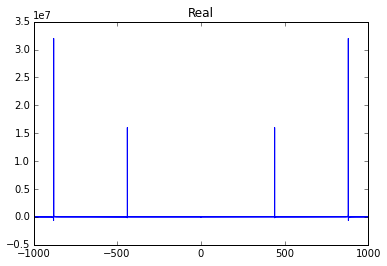

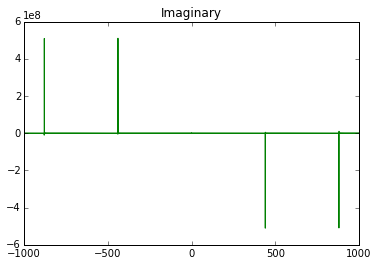

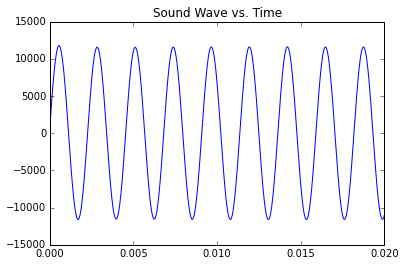

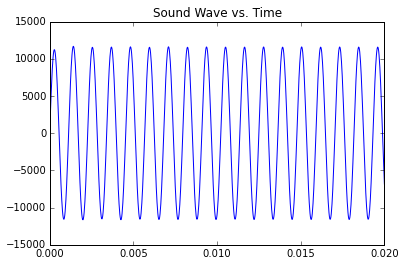

In [7]:
%matplotlib inline


'''Breakout Solutions'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os


def get_tone(f, duration, sample_rate = 44100, amp = 2**14, play_sound = False):


    time_pts = np.linspace(0, duration, duration*sample_rate)
#     tone = np.int16(amp*np.sin(np.pi*2*f*time_pts))
    tone = amp*np.sin(np.pi*2*f*time_pts)
    if play_sound:
        playsound(tone)
    
    return tone


def plot_fourier(sample_rate, signal, freq_lim = 1000.):
    '''
    Given sample_rate and signal, plots the real and imaginary parts of DFT.
    '''
    
    # note: This conversion to float64 is crucial -- or else the numerical error will be greater.
    #ft = np.fft.fft(np.float64(signal))
    ft = np.fft.fft(np.float64(signal))

    freq = np.fft.fftfreq(signal.shape[-1], d = 1./sample_rate)
    plt.figure()
    plt.title('Real')
    plt.plot(freq, ft.real, 'b-')
    plt.xlim([-freq_lim, freq_lim])
    plt.figure()
    plt.title('Imaginary')
    plt.plot(freq, ft.imag, 'g-')
    plt.xlim([-freq_lim, freq_lim])
    plt.show()
    
    return ft, freq


def signal_rec(ft, filt = None):
    
    '''
    does inverse fft and returns the array of sound data.
    '''
        
    import copy
    ft_filt = copy.copy(ft)
    try:
        len(filt)
    except:
        pass
    else:
        ft_filt *= filt

    tone_data_rec = np.fft.ifft(ft_filt)

    Re_to_Im = np.abs(float(np.abs(tone_data_rec.imag).max())/np.abs(tone_data_rec.real).max())
    if Re_to_Im > 1e-14:
        print 'WARNING: max the imaginary part may be too large:', Re_to_Im
        plt.figure()
        plt.title('imag/real')
        plt.plot(tone_data_rec.imag/tone_data_rec.real, 'k--')
        plt.show()

    # Rejecting the imaginary part
    tone_data_rec = tone_data_rec.real

    return tone_data_rec

    
def plotsound(time_pts, sound, fig = None, t_lim = 0.02, s_lim = 'auto', plot_style = 'b-'):
    
    if fig == None:
        plt.figure()
    plt.title("Sound Wave vs. Time")
    plt.plot(time_pts, sound, plot_style)
    plt.xlim([0, t_lim])
    if s_lim  != 'auto':
        plt.ylim([-s_lim, s_lim])
        
    return 

def playsound(sndarr, sample_rate = 44100, vol = 0.1):
    from scipy.io.wavfile import write
    import os
    write('tmp.wav', sample_rate, np.int16(vol*sndarr))
    os.system("afplay tmp.wav") 
    os.system("rm tmp.wav") 
    return




f = 440.
sample_rate = 44100
duration = 2.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone1 = get_tone(f, duration)
tone2 = get_tone(f*2, duration)



tone1 *= 1/np.sqrt(2.)
tone2 *= 1/np.sqrt(2.)

tone = np.int16(tone1 + tone2)
ft, freq = plot_fourier(sample_rate, tone)

# Get hight and low frequency parts of the tone.
# low pass filter
filt = np.abs(freq) < 500.
tone_lo_rec = signal_rec(ft, filt = filt)

# high pass filter
filt = np.abs(freq) > 500.
tone_hi_rec = signal_rec(ft, filt = filt)

plotsound(time_pts, tone_lo_rec)
plotsound(time_pts, tone_hi_rec)
plt.show()

playsound(tone)
playsound(tone_lo_rec, vol = 0.5)
playsound(tone_hi_rec, vol = 0.5)

In [8]:
'''get music segment'''

def get_music(music_file, start_time, end_time):
    
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io.wavfile import read, write
    import os
    sample_rate, barry_white = read(music_file)

    # It has two columns: stereosound!
    print 'Shape of sound data:', barry_white.shape

    duration = end_time - start_time
    time_pts = np.linspace(0, duration, duration*sample_rate)
    shortBW = barry_white[start_time*sample_rate: end_time*sample_rate, :]


    # just one channel
    shortBW = shortBW[:, 0]
    return sample_rate, time_pts, shortBW


Shape of sound data: (10133592, 2)


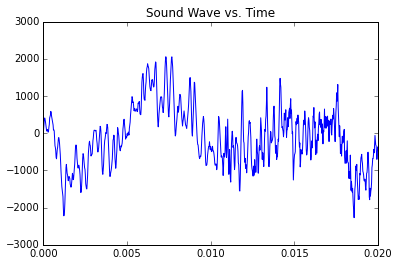

In [9]:
%matplotlib inline
start_time = 1
end_time = 5


sample_rate, time_pts, shortBW = get_music("BarryWhite.wav", start_time, end_time)

playsound(shortBW, vol = 0.5)

plotsound(time_pts, shortBW, s_lim = 3000)


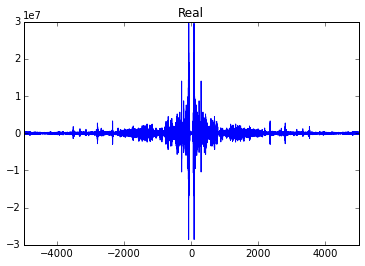

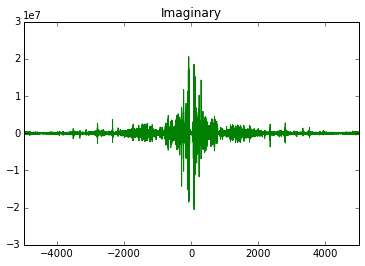

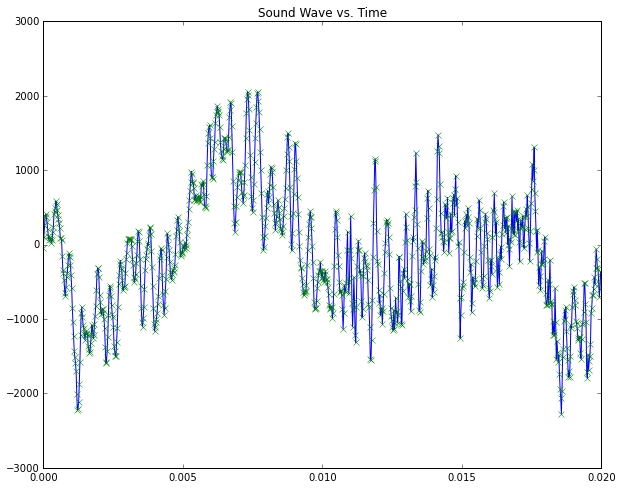

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdb import set_trace
# can we get Barry White back?

# Here there are indeed real and imaginary parts for the FT.
ft, freq = plot_fourier(sample_rate, shortBW, freq_lim = 5000.)
BW_rec = signal_rec(ft, filt = None)
playsound(BW_rec, vol = 0.5)

fig = plt.figure(figsize = (10, 8))
# Note here I'm passing fig as an argument -- so that the original array and the recovered array can be 
# plotted on the smae figure.
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_rec, fig = fig, s_lim = 3000, plot_style = 'gx')
plt.show()

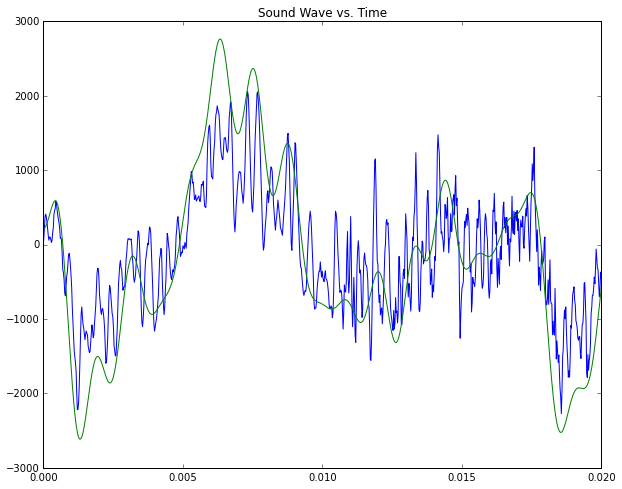

In [11]:
import numpy as np

filt = np.abs(freq) < 1000.
BW_base = signal_rec(ft, filt = filt)
BW_base = BW_base*float(shortBW.max())/BW_base.max()
playsound(shortBW)
playsound(BW_base)

fig = plt.figure(figsize = (10, 8))
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_base, fig = fig, s_lim = 3000, plot_style = 'g-')
plt.show()

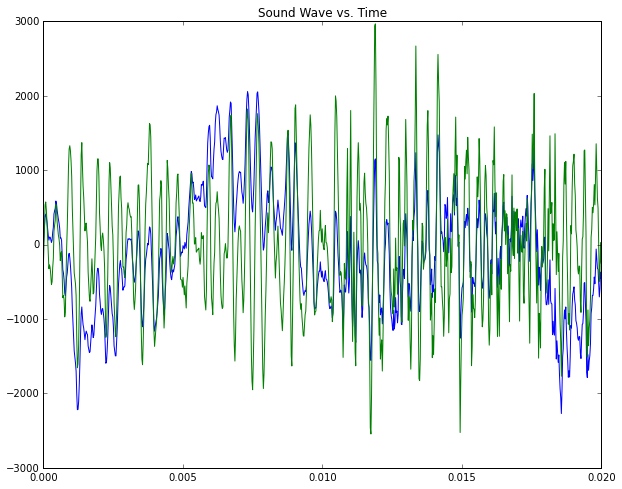

In [12]:
filt = np.abs(freq) > 1000.
BW_hi_pitch = signal_rec(ft, filt = filt)
BW_hi_pitch = BW_hi_pitch*float(shortBW.max())/BW_hi_pitch.max()

playsound(shortBW)
playsound(BW_hi_pitch)
fig = plt.figure(figsize = (10, 8))
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_hi_pitch, fig = fig, s_lim = 3000, plot_style = 'g-')
plt.show()

In [13]:
# More base!
BW_base *= 4/np.sqrt(17.)
BW_hi_pitch *= 1/np.sqrt(17.)
Ultra_BW = BW_base + BW_hi_pitch

playsound(shortBW, vol = 1.)
playsound(Ultra_BW, vol = 1.)

## Parseval's Theorem

N = 88200
Power spectrum summed (134205721.005+0j)
Sum of data squared divided by N: -1165
Sum of data squared divided by N: 1.34206e+08


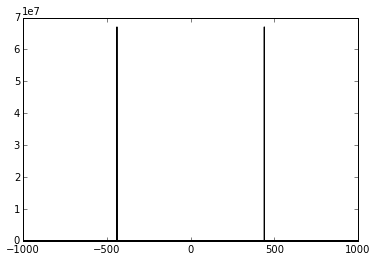

In [24]:
%matplotlib inline
'''

Parseval's Theorem and Conservation of Energy.

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**14
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))

playsound(tone_data, vol = 0.5)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


# Power spectrum
# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is (|ft|/N)^2
N = len(tone_data)
print 'N =', N
pwr = (ft * ft.conj())/N**2

if pwr.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, pwr.real, 'k-')
plt.xlim([-1000, 1000])


print "Power spectrum summed", pwr.sum()
print 'Sum of data squared divided by N: {:g}'.format((tone_data**2).sum()/N)
print 'Sum of data squared divided by N: {:g}'.format((tone_data.astype(np.float)**2).sum()/N)



In [29]:
'''
Largest int16

'''

import numpy as np

# largest 16-bit integer: 2^16 - 1
a = 2**16 - 1
b = np.int16(a + 2)
print 'largest int16:', a
print '(largest int16) + 2:', b

largest int16: 65535
(largest int16) + 2: 1


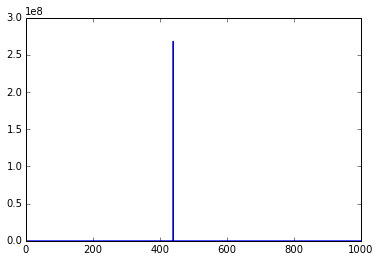

len(Pxx_den) 44101
Power spectral density integrated: 1.34206e+08


In [32]:
'''

Scipy's ready-made way of computing the (one-sided) power spectral density.

'''


from scipy import signal

# note the powers at the negative frequencies have been added to the powers of the corresponding 
# positive freqeuncies.
f, psd = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, psd)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print 'len(psd)', len(psd)
# sum of psd * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()

len(psd) 44101
Mean of sound amplitude squared: 1.34207e+08
Power spectral density integrated: 1.34207e+08


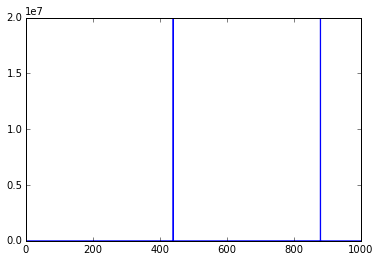

In [18]:
%matplotlib inline
'''

Two-frequency signal and PSD 

'''



from scipy import signal

f = 440.
sample_rate = 44100
duration = 2.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone1 = get_tone(f, duration)
tone2 = get_tone(f*2, duration)



tone1 *= 1/np.sqrt(2.)
tone2 *= 1/np.sqrt(2.)

tone = np.int16(tone1 + tone2)

def plot_psd(sound, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 2e7):


    f, psd = signal.periodogram(sound, sample_rate)
    plt.figure()
    plt.plot(f, psd)
    plt.xlim([0, freq_lim])
    plt.ylim([0, pwr_lim])
    
    return psd

    
df = 1./duration
psd = plot_psd(tone)

print 'len(psd)', len(psd)
# mean of sound signal squared
print 'Mean of sound amplitude squared: {:g}'.format((np.float64(tone)**2).mean())
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()

Shape of sound data: (10133592, 2)
len(Pxx_den) 88201
Mean of sound amplitude squared: 2.52558e+06
Power spectral density integrated: 2.52558e+06


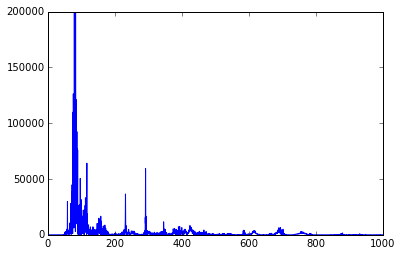

In [42]:
'''real music psd'''

ample_rate, time_pts, shortBW = get_music("BarryWhite.wav", start_time, end_time)


duration = len(time_pts)/sample_rate

df = 1./duration
psd = plot_psd(shortBW, pwr_lim = 2e5)

print 'len(psd)', len(psd)
# mean of sound signal squared
print 'Mean of sound amplitude squared: {:g}'.format((np.float64(shortBW)**2).mean())
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()


## Breakout -- Build a 3-band equalizer:
## equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.)
## - If any of the three weights is None, return input sound array
## - Otherwise, do FT
## - Split FT into three frequency ranges, < 500 Hz, [500 Hz, 1000 Hz], > 1000 Hz
## - Use signal_rec() to get the sound back for each of the frequency ranges
## - Normalize the weights -- how would you do it?
## - Put the three bands together according to the weight for each band, and get a new sound array
## - Return the new sound array.
## - Test it on Barry White segment.

In [34]:
def equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.):
    if (wt1 == None or wt2 == None or wt3 == None):
        return sound
    
    ft = np.fft.fft(np.float64(sound))
    freq = np.fft.fftfreq(sound.shape[-1], d = 1./sample_rate)
    filt = np.abs(freq) < 500.
    filt2 = (np.abs(freq) > 500.) * (np.abs(freq) < 1000.)
    filt3 = np.abs(freq) > 1000.
    
    data = signal_rec(ft, filt)
    data2 = signal_rec(ft, filt2)
    data3 = signal_rec(ft, filt3)
    
    newWT = wt1/(np.sqrt(wt1**2.+wt2**2.+wt3**2.))
    newWT2 = wt2/(np.sqrt(wt1**2.+wt2**2.+wt3**2.))
    newWT3 = wt3/(np.sqrt(wt1**2.+wt2**2.+wt3**2.))
    newData = ((newWT*data)+(newWT2*data2)+(newWT3*data3))
    newData = np.int16(newData*vol)
   
    return newData

one, two, sound = get_music("BarryWhite.wav", 1, 5)
eq = equalizer(44100, sound, 5, 500, 10)   
playsound(eq, vol = 1.)

Shape of sound data: (10133592, 2)
